# Exploratory Data Analysis


# Objective :- 
### With the help of past data we will try Find how volume of Traffic is effected.
### Which features are  Important in predicting traffic volume


If any feature engineering performed in train then same will be performed in test <br>
We will use train data for making inferences

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set()

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
df_train.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [4]:
df_test.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,2017-11-01 20:00:00,None,274.75,0.0,0.0,90,Mist,mist
1,2017-11-01 20:00:00,None,274.75,0.0,0.0,90,Rain,light rain
2,2017-11-01 21:00:00,None,274.79,0.0,0.0,90,Mist,mist
3,2017-11-01 21:00:00,None,274.79,0.0,0.0,90,Drizzle,drizzle
4,2017-11-01 22:00:00,None,275.08,0.0,0.0,90,Mist,mist


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            38563 non-null  object 
 1   holiday              38563 non-null  object 
 2   temp                 38563 non-null  float64
 3   rain_1h              38563 non-null  float64
 4   snow_1h              38563 non-null  float64
 5   clouds_all           38563 non-null  int64  
 6   weather_main         38563 non-null  object 
 7   weather_description  38563 non-null  object 
 8   traffic_volume       38563 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.6+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            9641 non-null   object 
 1   holiday              9641 non-null   object 
 2   temp                 9641 non-null   float64
 3   rain_1h              9641 non-null   float64
 4   snow_1h              9641 non-null   float64
 5   clouds_all           9641 non-null   int64  
 6   weather_main         9641 non-null   object 
 7   weather_description  9641 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 602.7+ KB


We can see that date_time columns is date-time nature but treated as object we will convert it dtype to datetime

In [7]:
df_train["date_time"]=pd.to_datetime(df_train["date_time"])
df_test["date_time"]=pd.to_datetime(df_test["date_time"])

print("Data type of date_time {} in train,Data type of date_time {} in test"\
      .format(df_train["date_time"].dtype,df_test["date_time"].dtype))

Data type of date_time datetime64[ns] in train,Data type of date_time datetime64[ns] in test


**Based on train data** <br>
shape - 38563x9 <br>
No null value is found. <br>
1 Column is Date-Time <br>
3 Columns are of Object Data type <br>
5 Columns are of numerical Data type. <br>
Traffic volume is our dependent column.<br>
_____________
**Based on test data** <br>
shape - 9641x8 <br>
No null value is found. <br>
1 Column is Date-Time <br>
3 Columns are of Object Data type <br>
4 Columns are of numerical Data type. <br>
Dependent feature is not present.<br>


In [8]:
# We can use date_time column to extract year,month,day of month
df_train["Month"]=df_train["date_time"].dt.month
df_test["Month"]=df_test["date_time"].dt.month


df_train["Year"]=df_train["date_time"].dt.year
df_test["Year"]=df_test["date_time"].dt.year

df_train["Hour"]=df_train["date_time"].dt.hour
df_test["Hour"]=df_test["date_time"].dt.hour

df_train["Weekday"]=df_train["date_time"].dt.weekday
df_test["Weekday"]=df_test["date_time"].dt.weekday
df_train.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,Month,Year,Hour,Weekday
0,2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,10,2012,9,1
1,2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10,2012,10,1
2,2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,10,2012,11,1
3,2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,10,2012,12,1
4,2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,10,2012,13,1


In [9]:
df_test.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Month,Year,Hour,Weekday
0,2017-11-01 20:00:00,None,274.75,0.0,0.0,90,Mist,mist,11,2017,20,2
1,2017-11-01 20:00:00,None,274.75,0.0,0.0,90,Rain,light rain,11,2017,20,2
2,2017-11-01 21:00:00,None,274.79,0.0,0.0,90,Mist,mist,11,2017,21,2
3,2017-11-01 21:00:00,None,274.79,0.0,0.0,90,Drizzle,drizzle,11,2017,21,2
4,2017-11-01 22:00:00,None,275.08,0.0,0.0,90,Mist,mist,11,2017,22,2


In [10]:
df_train.nunique()

date_time              32607
holiday                   12
temp                    5670
rain_1h                  353
snow_1h                   12
clouds_all                60
weather_main              11
weather_description       38
traffic_volume          6568
Month                     12
Year                       6
Hour                      24
Weekday                    7
dtype: int64

In [11]:
# dropping original date time columns
df_train=df_train.drop("date_time",1)
df_test=df_test.drop("date_time",1)

In [12]:
# extracting differemt type columns on different list so we can Analyse them accordingly
# col_conti means numerical contious columns
col_conti=["temp","rain_1h","snow_1h","clouds_all","traffic_volume"]

# col_cat means categorical columns ordinal and nominal 
col_cat=["holiday","weather_main","weather_description","Month","Year","Hour","Weekday"]
print(col_conti)
print(col_cat)

['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']
['holiday', 'weather_main', 'weather_description', 'Month', 'Year', 'Hour', 'Weekday']


In [13]:
df_train.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Month,Year,Hour,Weekday
count,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000
mean,281.351757,0.392733,0.000278,49.920364,3260.940409,6.580894,2014.934393,11.397635,2.985712
std,13.216927,50.075055,0.009131,38.849106,1991.628329,3.394472,1.665401,6.949958,2.004087
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2012.000000,0.000000,0.000000
25%,272.858000,0.000000,0.000000,1.000000,1186.500000,4.000000,2013.000000,5.000000,1.000000
50%,282.750000,0.000000,0.000000,64.000000,3378.000000,7.000000,2015.000000,11.000000,3.000000
75%,291.540000,0.000000,0.000000,90.000000,4939.000000,10.000000,2016.000000,17.000000,5.000000
max,308.240000,9831.300000,0.510000,100.000000,7280.000000,12.000000,2017.000000,23.000000,6.000000


In [14]:
# We can see overall view of data 
# We can see rain_1h may have outliers as there is huge difference in 99 th percetile and max


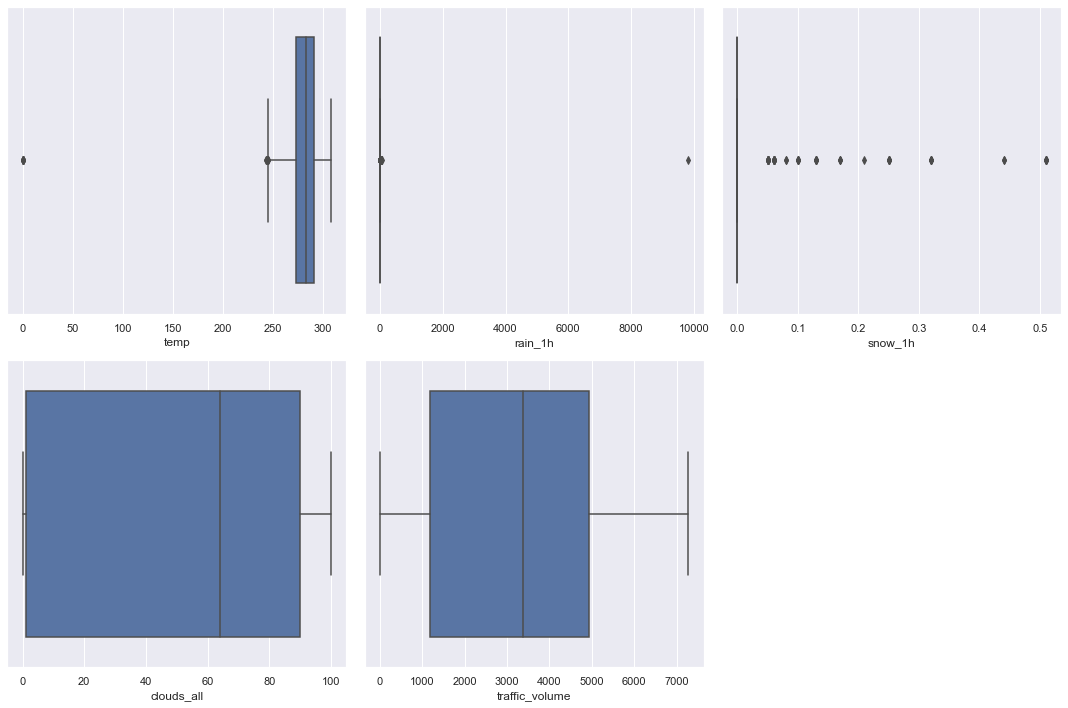

In [15]:
plt.figure(figsize=(15,10))
# Checking for outliers
for col in enumerate(col_conti):
    plt.subplot(2,3,col[0]+1)
    sns.boxplot(df_train[col[1]])
    plt.tight_layout()
plt.show()

In [16]:
for col in col_conti:
    
    Q1 = df_train[col].quantile(0.01)
    Q3 = df_train[col].quantile(0.99)
    IQR = Q3 - Q1
    df_train = df_train[~((df_train[col] < (Q1 - 1.5 * IQR)) |(df_train[col] > (Q3 + 1.5 * IQR)))]
    

In [17]:

df_train.shape

(38390, 12)

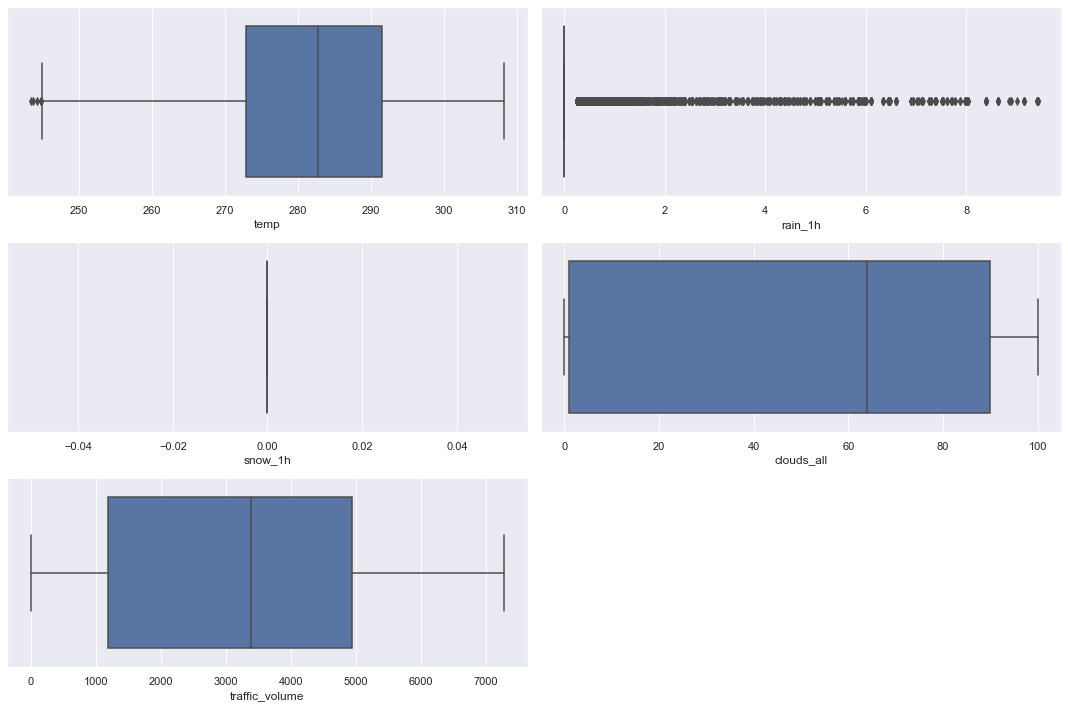

In [18]:
plt.figure(figsize=(15,10))
for col in enumerate(col_conti):
    plt.subplot(3,2,col[0]+1)
    sns.boxplot(df_train[col[1]])
    plt.tight_layout()
plt.show()

In [19]:
df_train["snow_1h"].value_counts()

0.0    38390
Name: snow_1h, dtype: int64

In [20]:
# dropping snow_1h and rain_1h as they are highly skewed 
df_train.drop(["snow_1h"],1,inplace=True)
df_test.drop(["snow_1h"],1,inplace=True)
col_conti=["temp","clouds_all","rain_1h","traffic_volume"]

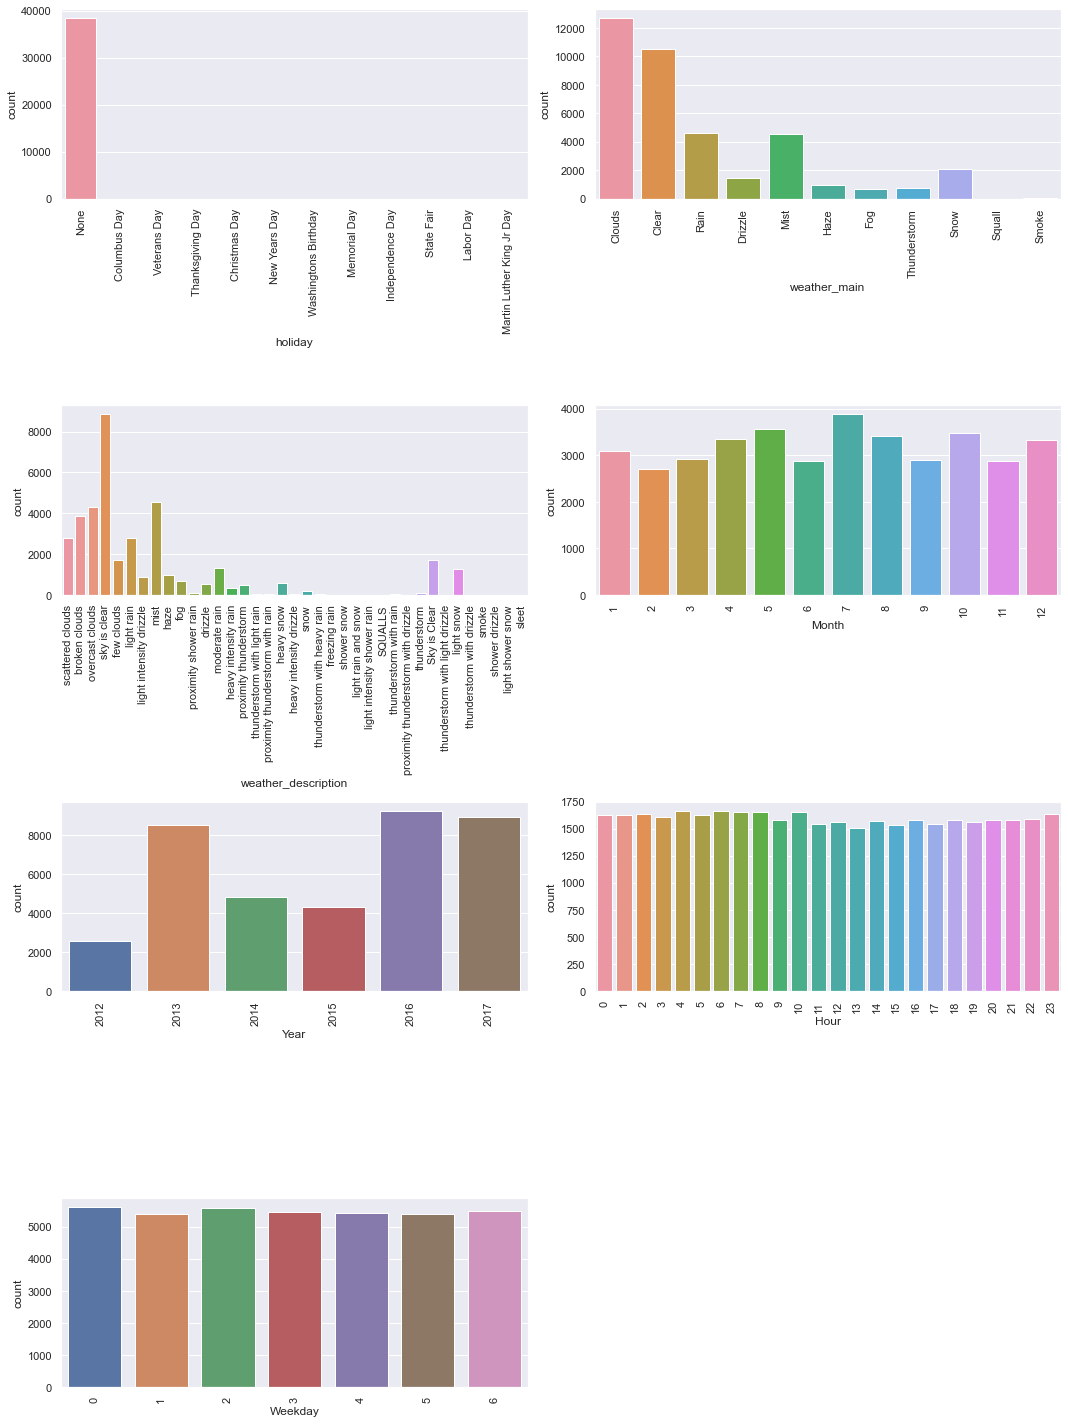

In [21]:
plt.figure(figsize=(15,20))
for col in enumerate(col_cat):
    plt.subplot(4,2,col[0]+1)
    sns.countplot(df_train[col[1]])
    plt.tight_layout()
    plt.xticks(rotation=90)
plt.show()

We can see that in holiday we have almost same value . We will convert holiday as binary columns If no holiday 1 else 0 <br>
We cannot see any skewness in categorical columns <br>
We can use one-hot encoding or other way to treat categorical columns in time of model building <br>

In [22]:
# creating columns holiday 
print(df_train["holiday"].value_counts())
df_train["holiday"]=df_train["holiday"].apply(lambda x: 0 if x == "None" else 1)
df_test["holiday"]=df_test["holiday"].apply(lambda x: 0 if x == "None" else 1)

None                         38342
Labor Day                        5
Thanksgiving Day                 5
New Years Day                    5
Columbus Day                     5
Christmas Day                    5
Independence Day                 4
State Fair                       4
Washingtons Birthday             4
Memorial Day                     4
Veterans Day                     4
Martin Luther King Jr Day        3
Name: holiday, dtype: int64


In [23]:
# Wrt to Traffic Volumne

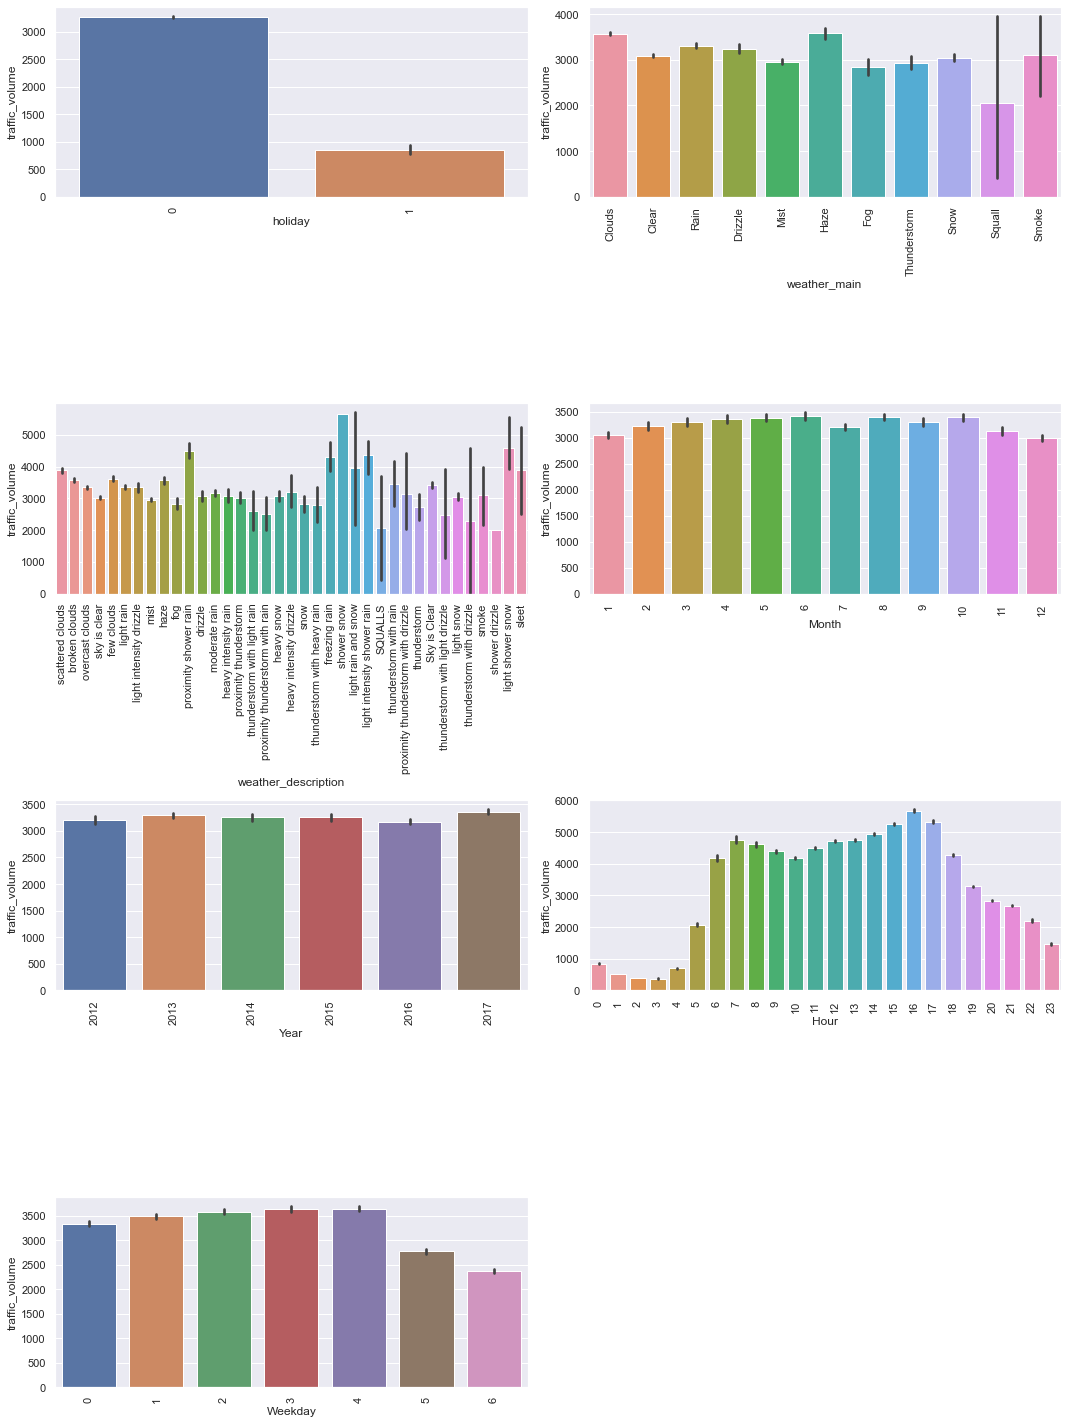

In [24]:
plt.figure(figsize=(15,20))
for col in enumerate(col_cat):
    plt.subplot(4,2,col[0]+1)
    sns.barplot(x=df_train[col[1]],y=df_train["traffic_volume"])
    plt.tight_layout()
    plt.xticks(rotation=90)
plt.show()

1. If we see plot between traffic volume and holiday, we can see that traffic is less on holiday. But we cannot rely on this as above we have found(count plot) that there is only 47 holiday and 37144 value in non-holiday which can be reason. <br>
2. weather main and weather description we cannot say it effect trafic much. We need to further analyse to make inferences <br>
3. If we hour vs traffic volume traffic is less between(0-4) i.e midnight. 
4. Traffic volume start increasing from 5 in morning reach peak at 16 and again start decreasing
5. If We see weekday vs traffic, traffic is high in normal days compare to weekend



<AxesSubplot:>

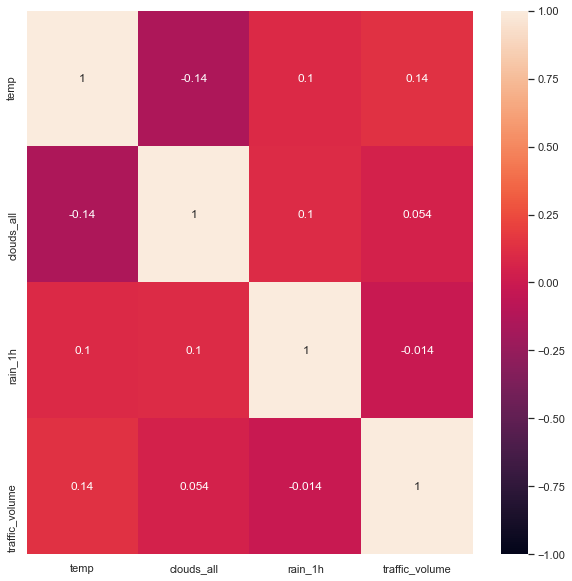

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train[col_conti].corr(),vmin=-1,annot=True)

We can see rain1h has negative impact on traffic volume but not so much <br>
Apart from that we can see that there is no so much correlation betwwen features

Generally hours, weekday ,days are cyclic in nature and they are need to treated as cyclic.<br>
A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation

In [26]:
df_train['hour_sin'] = np.sin(2 * np.pi * df_train['Hour']/23.0)
df_train['hour_cos'] = np.cos(2 * np.pi * df_train['Hour']/23.0)


df_test['hour_sin'] = np.sin(2 * np.pi * df_test['Hour']/23.0)
df_test['hour_cos'] = np.cos(2 * np.pi * df_test['Hour']/23.0)

In [27]:
df_train['wd_sin'] = np.sin(2 * np.pi * df_train['Weekday']/6)
df_train['wd_cos'] = np.cos(2 * np.pi * df_train['Weekday']/6)


df_test['wd_sin'] = np.sin(2 * np.pi * df_test['Weekday']/6)
df_test['wd_cos'] = np.cos(2 * np.pi * df_test['Weekday']/6)

In [28]:
df_train['month_sin'] = np.sin(2 * np.pi * df_train['Month']/12)
df_train['month_cos'] = np.cos(2 * np.pi * df_train['Month']/12)


df_test['month_sin'] = np.sin(2 * np.pi * df_test['Month']/12)
df_test['month_cos'] = np.cos(2 * np.pi * df_test['Month']/12)

In [29]:
# dropping 
# hour and weekday month
df_train.drop(["Month","Weekday","Hour"],1,inplace=True)
df_test.drop(["Month","Weekday","Hour"],1,inplace=True)

In [30]:
df_train.head()


,holiday,temp,rain_1h,clouds_all,weather_main,weather_description,traffic_volume,Year,hour_sin,hour_cos,wd_sin,wd_cos,month_sin,month_cos
0,0,288.28,0.0,40,Clouds,scattered clouds,5545,2012,0.631088,-0.775711,0.866025,0.5,-0.866025,0.5
1,0,289.36,0.0,75,Clouds,broken clouds,4516,2012,0.398401,-0.917211,0.866025,0.5,-0.866025,0.5
2,0,289.58,0.0,90,Clouds,overcast clouds,4767,2012,0.136167,-0.990686,0.866025,0.5,-0.866025,0.5
3,0,290.13,0.0,90,Clouds,overcast clouds,5026,2012,-0.136167,-0.990686,0.866025,0.5,-0.866025,0.5
4,0,291.14,0.0,75,Clouds,broken clouds,4918,2012,-0.398401,-0.917211,0.866025,0.5,-0.866025,0.5


In [31]:
#mean encoding weather_main, weather_description


mean_encoded_weath_main = df_train.groupby(['weather_main'])['traffic_volume'].mean().to_dict()
mean_encoded_weath_main

{'Clear': 3087.541421800948,
 'Clouds': 3564.107097791798,
 'Drizzle': 3234.8089128966913,
 'Fog': 2834.822931785196,
 'Haze': 3574.3504531722056,
 'Mist': 2957.509980258829,
 'Rain': 3308.490200348432,
 'Smoke': 3103.722222222222,
 'Snow': 3046.159309021113,
 'Squall': 2061.75,
 'Thunderstorm': 2936.083783783784}

In [32]:
df_train["weather_main_encoded"]=df_train['weather_main'].map(mean_encoded_weath_main)
df_test["weather_main_encoded"]=df_test['weather_main'].map(mean_encoded_weath_main)

In [33]:
mean_encoded_weath_desc = df_train.groupby(['weather_description'])['traffic_volume'].mean().to_dict()
mean_encoded_weath_desc

{'SQUALLS': 2061.75,
 'Sky is Clear': 3420.036214953271,
 'broken clouds': 3564.46403712297,
 'drizzle': 3073.5180505415165,
 'few clouds': 3619.433255269321,
 'fog': 2834.822931785196,
 'freezing rain': 4314.0,
 'haze': 3574.3504531722056,
 'heavy intensity drizzle': 3206.375,
 'heavy intensity rain': 3067.8891966759,
 'heavy snow': 3085.862010221465,
 'light intensity drizzle': 3340.7540229885058,
 'light intensity shower rain': 4351.545454545455,
 'light rain': 3361.3021840315073,
 'light rain and snow': 3961.1666666666665,
 'light shower snow': 4570.75,
 'light snow': 3049.236434108527,
 'mist': 2957.509980258829,
 'moderate rain': 3168.560480841473,
 'overcast clouds': 3339.694560669456,
 'proximity shower rain': 4501.202127659574,
 'proximity thunderstorm': 3023.021141649049,
 'proximity thunderstorm with drizzle': 3131.5,
 'proximity thunderstorm with rain': 2507.0263157894738,
 'scattered clouds': 3875.6589036187747,
 'shower drizzle': 2010.0,
 'shower snow': 5664.0,
 'sky is c

In [34]:
df_train["weather_desc_encoded"]=df_train['weather_description'].map(mean_encoded_weath_desc)
df_test["weather_desc_encoded"]=df_test['weather_description'].map(mean_encoded_weath_desc)

In [35]:
df_train.drop(["weather_main", "weather_description"],1,inplace=True)
df_test.drop(["weather_main", "weather_description"],1,inplace=True)

In [36]:
df_train.head()

,holiday,temp,rain_1h,clouds_all,traffic_volume,Year,hour_sin,hour_cos,wd_sin,wd_cos,month_sin,month_cos,weather_main_encoded,weather_desc_encoded
0,0,288.28,0.0,40,5545,2012,0.631088,-0.775711,0.866025,0.5,-0.866025,0.5,3564.107098,3875.658904
1,0,289.36,0.0,75,4516,2012,0.398401,-0.917211,0.866025,0.5,-0.866025,0.5,3564.107098,3564.464037
2,0,289.58,0.0,90,4767,2012,0.136167,-0.990686,0.866025,0.5,-0.866025,0.5,3564.107098,3339.694561
3,0,290.13,0.0,90,5026,2012,-0.136167,-0.990686,0.866025,0.5,-0.866025,0.5,3564.107098,3339.694561
4,0,291.14,0.0,75,4918,2012,-0.398401,-0.917211,0.866025,0.5,-0.866025,0.5,3564.107098,3564.464037


In [37]:
# handling year columns
df_train["Year"]=df_train["Year"].astype("O")
df_test["Year"]=df_test["Year"].astype("O")

In [38]:
df_train=pd.get_dummies(df_train)
df_test=pd.get_dummies(df_test)

In [39]:
df_train.drop('Year_2012',1,inplace=True)

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38390 entries, 0 to 38562
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   holiday               38390 non-null  int64  
 1   temp                  38390 non-null  float64
 2   rain_1h               38390 non-null  float64
 3   clouds_all            38390 non-null  int64  
 4   traffic_volume        38390 non-null  int64  
 5   hour_sin              38390 non-null  float64
 6   hour_cos              38390 non-null  float64
 7   wd_sin                38390 non-null  float64
 8   wd_cos                38390 non-null  float64
 9   month_sin             38390 non-null  float64
 10  month_cos             38390 non-null  float64
 11  weather_main_encoded  38390 non-null  float64
 12  weather_desc_encoded  38390 non-null  float64
 13  Year_2013             38390 non-null  uint8  
 14  Year_2014             38390 non-null  uint8  
 15  Year_2015          

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   holiday               9641 non-null   int64  
 1   temp                  9641 non-null   float64
 2   rain_1h               9641 non-null   float64
 3   clouds_all            9641 non-null   int64  
 4   hour_sin              9641 non-null   float64
 5   hour_cos              9641 non-null   float64
 6   wd_sin                9641 non-null   float64
 7   wd_cos                9641 non-null   float64
 8   month_sin             9641 non-null   float64
 9   month_cos             9641 non-null   float64
 10  weather_main_encoded  9641 non-null   float64
 11  weather_desc_encoded  9641 non-null   float64
 12  Year_2017             9641 non-null   uint8  
 13  Year_2018             9641 non-null   uint8  
dtypes: float64(10), int64(2), uint8(2)
memory usage: 922.8 KB


In [42]:
# We need to add 2018 in train data as =0 and
# Year_2013, Year_2014, Year_2015,Year_2016 as =0 in test data
df_train["Year_2018"]=0

df_test["Year_2013"]=0
df_test["Year_2014"]=0
df_test["Year_2015"]=0
df_test["Year_2016"]=0
df_test["Year_2017"]=0

In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   holiday               9641 non-null   int64  
 1   temp                  9641 non-null   float64
 2   rain_1h               9641 non-null   float64
 3   clouds_all            9641 non-null   int64  
 4   hour_sin              9641 non-null   float64
 5   hour_cos              9641 non-null   float64
 6   wd_sin                9641 non-null   float64
 7   wd_cos                9641 non-null   float64
 8   month_sin             9641 non-null   float64
 9   month_cos             9641 non-null   float64
 10  weather_main_encoded  9641 non-null   float64
 11  weather_desc_encoded  9641 non-null   float64
 12  Year_2017             9641 non-null   int64  
 13  Year_2018             9641 non-null   uint8  
 14  Year_2013             9641 non-null   int64  
 15  Year_2014            

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38390 entries, 0 to 38562
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   holiday               38390 non-null  int64  
 1   temp                  38390 non-null  float64
 2   rain_1h               38390 non-null  float64
 3   clouds_all            38390 non-null  int64  
 4   traffic_volume        38390 non-null  int64  
 5   hour_sin              38390 non-null  float64
 6   hour_cos              38390 non-null  float64
 7   wd_sin                38390 non-null  float64
 8   wd_cos                38390 non-null  float64
 9   month_sin             38390 non-null  float64
 10  month_cos             38390 non-null  float64
 11  weather_main_encoded  38390 non-null  float64
 12  weather_desc_encoded  38390 non-null  float64
 13  Year_2013             38390 non-null  uint8  
 14  Year_2014             38390 non-null  uint8  
 15  Year_2015          

In [45]:
df_train.columns

Index(['holiday', 'temp', 'rain_1h', 'clouds_all', 'traffic_volume',
       'hour_sin', 'hour_cos', 'wd_sin', 'wd_cos', 'month_sin', 'month_cos',
       'weather_main_encoded', 'weather_desc_encoded', 'Year_2013',
       'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018'],
      dtype='object')

In [46]:
# positioning columns as  train_df in test_df
df_test_final=df_test[['holiday', 'temp', 'rain_1h', 'clouds_all',
       'hour_sin', 'hour_cos', 'wd_sin', 'wd_cos', 'month_sin', 'month_cos',
       'weather_main_encoded', 'weather_desc_encoded', 'Year_2013',
       'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018']]

In [47]:
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   holiday               9641 non-null   int64  
 1   temp                  9641 non-null   float64
 2   rain_1h               9641 non-null   float64
 3   clouds_all            9641 non-null   int64  
 4   hour_sin              9641 non-null   float64
 5   hour_cos              9641 non-null   float64
 6   wd_sin                9641 non-null   float64
 7   wd_cos                9641 non-null   float64
 8   month_sin             9641 non-null   float64
 9   month_cos             9641 non-null   float64
 10  weather_main_encoded  9641 non-null   float64
 11  weather_desc_encoded  9641 non-null   float64
 12  Year_2013             9641 non-null   int64  
 13  Year_2014             9641 non-null   int64  
 14  Year_2015             9641 non-null   int64  
 15  Year_2016            

<AxesSubplot:>

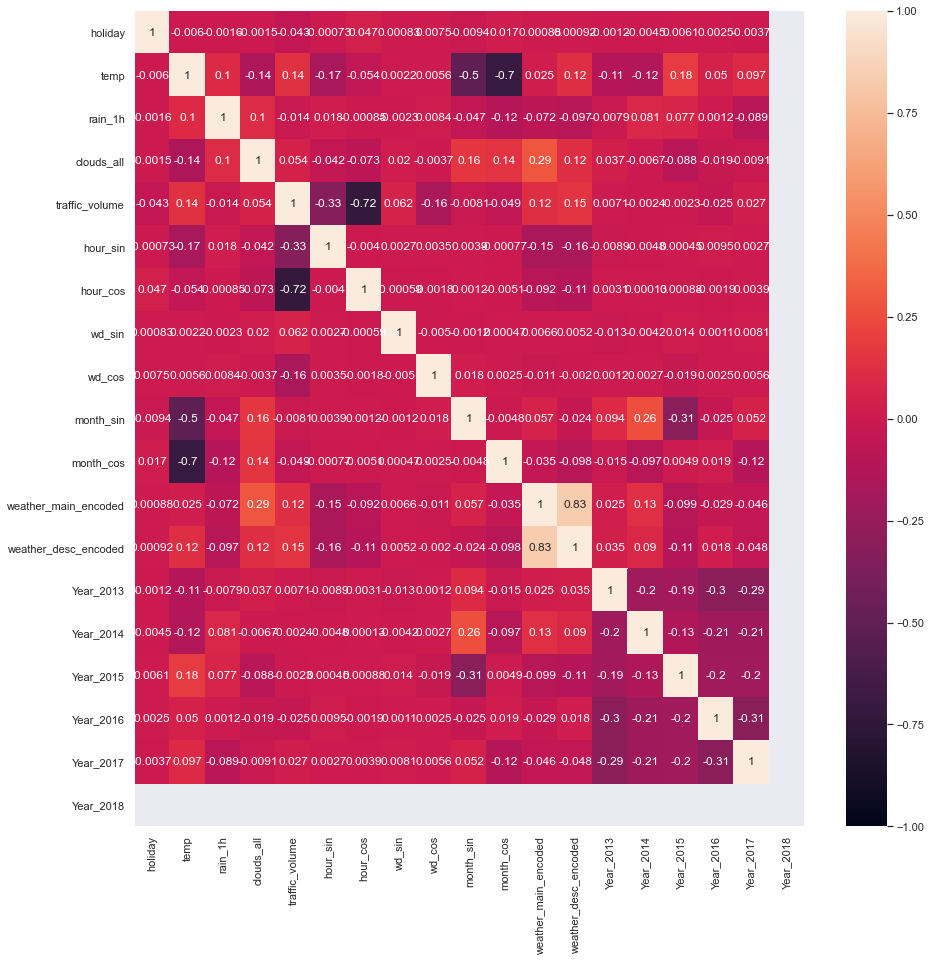

In [48]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),vmin=-1,annot=True)

# Model Building and Evaluation

In [49]:
# Loading Various Library
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge,LinearRegression
pd.set_option('display.max_columns',None)

In [50]:
train=pd.read_csv("train_fe")

In [51]:
train.head()

,Unnamed: 0,holiday,temp,rain_1h,clouds_all,traffic_volume,hour_sin,hour_cos,wd_sin,wd_cos,month_sin,month_cos,weather_main_encoded,weather_desc_encoded,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
0,0,0,288.28,0.0,40,5545,0.631088,-0.775711,0.866025,0.5,-0.866025,0.5,3564.107098,3875.658904,0,0,0,0,0,0
1,1,0,289.36,0.0,75,4516,0.398401,-0.917211,0.866025,0.5,-0.866025,0.5,3564.107098,3564.464037,0,0,0,0,0,0
2,2,0,289.58,0.0,90,4767,0.136167,-0.990686,0.866025,0.5,-0.866025,0.5,3564.107098,3339.694561,0,0,0,0,0,0
3,3,0,290.13,0.0,90,5026,-0.136167,-0.990686,0.866025,0.5,-0.866025,0.5,3564.107098,3339.694561,0,0,0,0,0,0
4,4,0,291.14,0.0,75,4918,-0.398401,-0.917211,0.866025,0.5,-0.866025,0.5,3564.107098,3564.464037,0,0,0,0,0,0


In [52]:
test=pd.read_csv("test_fe")
test.head()

,Unnamed: 0,holiday,temp,rain_1h,clouds_all,hour_sin,hour_cos,wd_sin,wd_cos,month_sin,month_cos,weather_main_encoded,weather_desc_encoded,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018
0,0,0,274.75,0.0,90,-0.730836,0.682553,0.866025,-0.5,-0.5,0.866025,2957.509980,2957.509980,0,0,0,0,0,0
1,1,0,274.75,0.0,90,-0.730836,0.682553,0.866025,-0.5,-0.5,0.866025,3308.490200,3361.302184,0,0,0,0,0,0
2,2,0,274.79,0.0,90,-0.519584,0.854419,0.866025,-0.5,-0.5,0.866025,2957.509980,2957.509980,0,0,0,0,0,0
3,3,0,274.79,0.0,90,-0.519584,0.854419,0.866025,-0.5,-0.5,0.866025,3234.808913,3073.518051,0,0,0,0,0,0
4,4,0,275.08,0.0,90,-0.269797,0.962917,0.866025,-0.5,-0.5,0.866025,2957.509980,2957.509980,0,0,0,0,0,0


In [53]:
train=train.set_index("Unnamed: 0")
test=test.set_index("Unnamed: 0")

In [54]:
#splitting train data
X=train.drop("traffic_volume",1)
y=train["traffic_volume"]

In [55]:
# Storing Columns name in 
train_columns=X.columns.to_list()
train_columns

['holiday',
 'temp',
 'rain_1h',
 'clouds_all',
 'hour_sin',
 'hour_cos',
 'wd_sin',
 'wd_cos',
 'month_sin',
 'month_cos',
 'weather_main_encoded',
 'weather_desc_encoded',
 'Year_2013',
 'Year_2014',
 'Year_2015',
 'Year_2016',
 'Year_2017',
 'Year_2018']

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=100)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30712, 18)
(7678, 18)
(30712,)
(7678,)


In [58]:
# Initialising scaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

# Lasso And Ridge Regularization

In [59]:
folds=KFold(n_splits=5, shuffle=True, random_state=100)

In [60]:
# defining parameter Range
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,\
                                    0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,80, 100, 500, 1000]}

# Initialising Lasso
l1=Lasso()

In [61]:
cv_l1 = GridSearchCV(estimator = l1, param_grid = params, 
                            scoring='r2', 
                            cv = folds, n_jobs=-1,
                            return_train_score=True, verbose = 1)

In [62]:
cv_l1.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   10.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   80, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [63]:
cv_l1.best_score_

0.6666317846531487

In [64]:
# transforming hold out dataset
X_test=scaler.transform(X_test)

In [65]:
np.sqrt(mean_squared_error(y_train,cv_l1.predict(X_train)))


1147.7351297051205

In [66]:
np.sqrt(mean_squared_error(y_test,cv_l1.predict(X_test)))


1161.6418977472183

In [67]:
r2_score(y_test,cv_l1.predict(X_test))

0.6620503150984611

In terms of Performance we are getting 66 r2 Score

In [68]:
result_l1=pd.DataFrame(cv_l1.cv_results_)
result_l1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.458141,0.045587,0.003598,0.000800,0.0001,{'alpha': 0.0001},0.662795,0.667298,0.671493,0.656344,0.675127,0.666611,0.006585,16,0.668066,0.666972,0.665906,0.669702,0.664927,0.667115,0.001665
1,0.364992,0.027221,0.003202,0.000752,0.001,{'alpha': 0.001},0.662795,0.667298,0.671493,0.656344,0.675127,0.666612,0.006585,15,0.668066,0.666972,0.665906,0.669702,0.664927,0.667115,0.001665
2,0.294235,0.018066,0.003797,0.000403,0.01,{'alpha': 0.01},0.662795,0.667299,0.671493,0.656344,0.675128,0.666612,0.006585,14,0.668066,0.666972,0.665906,0.669702,0.664927,0.667115,0.001665
3,0.257452,0.016587,0.003600,0.000803,0.05,{'alpha': 0.05},0.662794,0.667300,0.671493,0.656346,0.675130,0.666613,0.006585,13,0.668066,0.666972,0.665906,0.669702,0.664926,0.667115,0.001665
4,0.237465,0.012542,0.003397,0.000798,0.1,{'alpha': 0.1},0.662794,0.667301,0.671494,0.656347,0.675133,0.666614,0.006586,12,0.668066,0.666972,0.665906,0.669702,0.664926,0.667114,0.001665


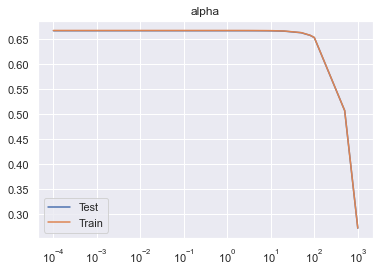

In [69]:
plt.plot(result_l1.groupby(result_l1["param_alpha"])["mean_test_score"].mean(),label="Test")
plt.plot(result_l1.groupby(result_l1["param_alpha"])["mean_train_score"].mean(),label="Train")
plt.xscale('log')
plt.legend()
plt.title("alpha")
plt.show()

We can see after alpha increases model start underfitting


In [70]:
# Let's See Coefficient and intercept or Constant 

In [71]:
cv_l1.best_estimator_.coef_

array([  -11.49724956,    24.59979622,   -14.81493874,    -4.08366399,
        -648.92388847, -1441.25005862,   116.67081801,  -314.39887446,
          -0.        ,   -74.02328997,   -14.08072919,    25.47413002,
          17.09388338,    -6.57554757,    -3.19110424,   -24.26785833,
          48.62857027,     0.        ])

In [72]:
cv_l1.best_estimator_.intercept_

3260.5501758270384

In [73]:
list(zip(train_columns,cv_l1.best_estimator_.coef_))

[('holiday', -11.497249563999684),
 ('temp', 24.599796215296642),
 ('rain_1h', -14.814938735138469),
 ('clouds_all', -4.083663991185618),
 ('hour_sin', -648.9238884694869),
 ('hour_cos', -1441.250058615643),
 ('wd_sin', 116.6708180094608),
 ('wd_cos', -314.3988744616348),
 ('month_sin', -0.0),
 ('month_cos', -74.02328996963419),
 ('weather_main_encoded', -14.080729186145605),
 ('weather_desc_encoded', 25.474130015968036),
 ('Year_2013', 17.09388338432688),
 ('Year_2014', -6.575547571409038),
 ('Year_2015', -3.191104243520358),
 ('Year_2016', -24.267858331633597),
 ('Year_2017', 48.628570270276455),
 ('Year_2018', 0.0)]

#### Possible Regression Line Can be

#### traiff_volume = 3260.6 + (- 11.5 * holiday)+ (24.59 * temp)+ (-14.9 * rain_1h)+(-4.1 * clouds_all)+(-649 * hour_sin)+(-1441.3* hour_cos)+( 116.68 * wd_sin)+(-314.39 * wd_cos)+(0 * month_sin )+(-74.02 * month_cos )+(-14.1 * weather_main_encoded)+(25.47 * weather_desc_encoded)+ (17.1 * Year_2013)+ (-6.58 * Year_2014)+ (-3.19 * Year_2015) + (-24.27 * Year_2016)+(48.62 * Year_2017)+(0* Year_2018) **

In [74]:
l2=Ridge()
cv_l2 = GridSearchCV(estimator = l2, param_grid = params, 
                            scoring='r2', 
                            cv = folds, n_jobs=-1,
                            return_train_score=True, verbose = 1)

In [75]:
cv_l2.fit(X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:    2.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   80, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [76]:
cv_l2.best_score_

0.6666116445123188

In [77]:
np.sqrt(mean_squared_error(y_train,cv_l2.predict(X_train)))


1147.6945560017198

In [78]:
np.sqrt(mean_squared_error(y_test,cv_l2.predict(X_test)))


1161.4837655433225

In [79]:
r2_score(y_test,cv_l2.predict(X_test))

0.662142317790837

We again getting low r2 score and high RMSE in Ridge Regression


In [80]:
result_l2=pd.DataFrame(cv_l2.cv_results_)
result_l2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.153117,0.055367,0.000000,0.000000,0.0001,{'alpha': 0.0001},0.662795,0.667298,0.671493,0.656344,0.675127,0.666611,0.006585,24,0.668066,0.666972,0.665906,0.669702,0.664927,0.667115,0.001665
1,0.040625,0.007652,0.000000,0.000000,0.001,{'alpha': 0.001},0.662795,0.667298,0.671493,0.656344,0.675127,0.666611,0.006585,23,0.668066,0.666972,0.665906,0.669702,0.664927,0.667115,0.001665
2,0.040624,0.007654,0.006249,0.007654,0.01,{'alpha': 0.01},0.662795,0.667298,0.671493,0.656344,0.675127,0.666611,0.006585,22,0.668066,0.666972,0.665906,0.669702,0.664927,0.667115,0.001665
3,0.040625,0.012499,0.003124,0.006248,0.05,{'alpha': 0.05},0.662795,0.667298,0.671493,0.656344,0.675127,0.666611,0.006585,21,0.668066,0.666972,0.665906,0.669702,0.664927,0.667115,0.001665
4,0.034373,0.006250,0.000000,0.000000,0.1,{'alpha': 0.1},0.662795,0.667298,0.671493,0.656344,0.675127,0.666611,0.006585,20,0.668066,0.666972,0.665906,0.669702,0.664927,0.667115,0.001665


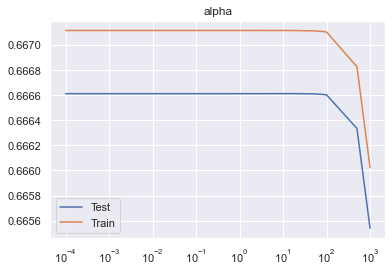

In [81]:
plt.plot(result_l2.groupby(result_l2["param_alpha"])["mean_test_score"].mean(),label="Test")
plt.plot(result_l2.groupby(result_l2["param_alpha"])["mean_train_score"].mean(),label="Train")
plt.xscale('log')
plt.legend()
plt.title("alpha")
plt.show()

We can see same behaviour as we saw in Lasso model start underfitting

### Now Question arise Can we do better than this 
##### For that we try some enemble,boosting based model

### Making  Random Forest with Hyper Parameter tuning

In [82]:
rf=RandomForestRegressor()
# Initializing Different Hyper Parameter
param={
    "max_depth":[2,3,5,8,10,12],
    "min_samples_split":[2,3,4,6,8],
    "n_estimators":[50,80,100,150],
    "max_samples":[50,100,200,500,1000],
    "max_features":[3,7,10,17],   
}

In [83]:
folds=KFold(n_splits=5, shuffle=True, random_state=100)

In [84]:
# Initialising Model and cross validation
cv_rf= GridSearchCV(estimator=rf,param_grid=param,cv=folds,scoring="r2",return_train_score=True,refit=True,n_jobs=-1,verbose=1)

In [85]:
# Traing rf model
cv_rf.fit(X_train,y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 8, 10, 12],
                         'max_features': [3, 7, 10, 17],
                         'max_samples': [50, 100, 200, 500, 1000],
                         'min_samples_split': [2, 3, 4, 6, 8],
                         'n_estimators': [50, 80, 100, 150]},
             return_train_score=True, scoring='r2', verbose=1)

In [86]:
# CHecking Best Score
cv_rf.best_score_

0.8844471190910879

In [87]:
# predictiing on holod out set
y_test_pred=cv_rf.predict(X_test)

In [88]:
# CHecking RMSE of training dataset
np.sqrt(mean_squared_error(y_train,cv_rf.predict(X_train)))

657.1887128804907

In [89]:
#checking rmse of hold out set
np.sqrt(mean_squared_error(y_test,y_test_pred)) 

665.3627777573898

In [90]:
# adjusted R2 score of hold out set
r2_score(y_test,y_test_pred)

0.889127328079963

In [91]:
# We can see that rf model is giving 88 r2 score in hold out set 

#### Visualising behaviour with respect to diffenrt parameter

In [92]:
score_rf=pd.DataFrame(cv_rf.cv_results_)
score_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.215477,0.005275,0.032584,0.007627,2,3,50,2,50,"{'max_depth': 2, 'max_features': 3, 'max_sampl...",0.317142,0.360017,0.376263,0.324031,0.446758,0.364842,0.046486,2394,0.318383,0.363785,0.374811,0.328247,0.444243,0.365894,0.044491
1,0.350596,0.010299,0.038179,0.001939,2,3,50,2,80,"{'max_depth': 2, 'max_features': 3, 'max_sampl...",0.399229,0.366669,0.381824,0.318150,0.464454,0.386065,0.047592,2373,0.402249,0.369660,0.377993,0.324367,0.461315,0.387117,0.044855
2,0.428954,0.023880,0.049773,0.003248,2,3,50,2,100,"{'max_depth': 2, 'max_features': 3, 'max_sampl...",0.378415,0.399086,0.383191,0.355509,0.320811,0.367402,0.027153,2392,0.381206,0.403409,0.378713,0.365202,0.318703,0.369447,0.028180
3,0.645428,0.022504,0.069360,0.005745,2,3,50,2,150,"{'max_depth': 2, 'max_features': 3, 'max_sampl...",0.401946,0.398628,0.418318,0.373614,0.346993,0.387900,0.024960,2370,0.404570,0.401644,0.414624,0.378731,0.342001,0.388314,0.025965
4,0.240063,0.009405,0.028184,0.003969,2,3,50,3,50,"{'max_depth': 2, 'max_features': 3, 'max_sampl...",0.381498,0.364082,0.415598,0.389528,0.375736,0.385288,0.017274,2374,0.383973,0.369456,0.412543,0.398218,0.371909,0.387220,0.016265


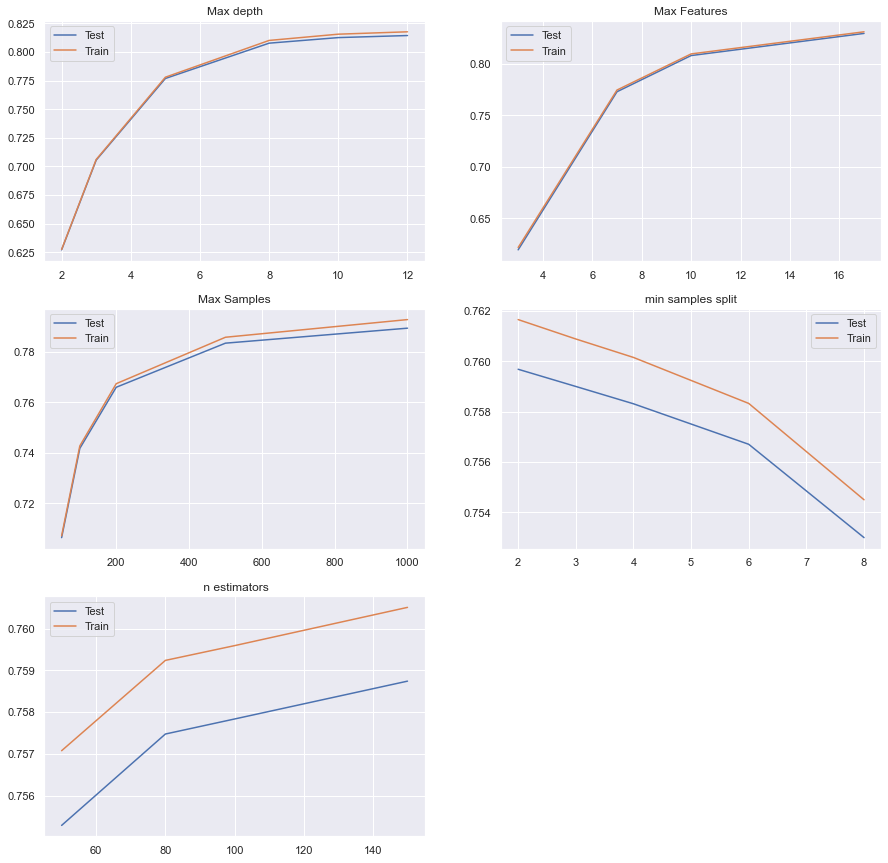

In [93]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.plot(score_rf.groupby(score_rf["param_max_depth"])["mean_test_score"].mean(),label="Test")
plt.plot(score_rf.groupby(score_rf["param_max_depth"])["mean_train_score"].mean(),label="Train")
plt.title("Max depth")
plt.legend()

plt.subplot(3,2,2)
plt.plot(score_rf.groupby(score_rf["param_max_features"])["mean_test_score"].mean(),label="Test")
plt.plot(score_rf.groupby(score_rf["param_max_features"])["mean_train_score"].mean(),label="Train")
plt.title("Max Features")
plt.legend()


plt.subplot(3,2,3)
plt.plot(score_rf.groupby(score_rf["param_max_samples"])["mean_test_score"].mean(),label="Test")
plt.plot(score_rf.groupby(score_rf["param_max_samples"])["mean_train_score"].mean(),label="Train")
plt.title("Max Samples")
plt.legend()

         
         
plt.subplot(3,2,4)
plt.plot(score_rf.groupby(score_rf["param_min_samples_split"])["mean_test_score"].mean(),label="Test")
plt.plot(score_rf.groupby(score_rf["param_min_samples_split"])["mean_train_score"].mean(),label="Train")
plt.title("min samples split")
plt.legend()

plt.subplot(3,2,5)
plt.plot(score_rf.groupby(score_rf["param_n_estimators"])["mean_test_score"].mean(),label="Test")
plt.plot(score_rf.groupby(score_rf["param_n_estimators"])["mean_train_score"].mean(),label="Train")
plt.title(" n estimators")
plt.legend()

plt.show()

We can see that as maximum depth, number of estimator maximum number of features increases r2 score also increses but after some limit, gap between test and train score also increases which means model start overfitting

#  Training XGB regressor

In [94]:

xgb=XGBRegressor()

In [95]:
param_xgb={
    "max_depth":[3,5,8,10],
    "n_estimators":[50,100,200],
    "learning_rate":[0.1,0.3,0.5,0.8]    
}

In [96]:
cv_xgb= GridSearchCV(estimator=xgb,param_grid=param_xgb,cv=folds,scoring="r2",return_train_score=True ,refit=True,n_jobs=-1,verbose=5)

In [ ]:
cv_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.1min


In [ ]:
cv_xgb.best_score_

In [ ]:
#
r2_score(y_test,cv_xgb.predict(X_test))

In [ ]:
np.sqrt(mean_squared_error(y_train,cv_xgb.predict(X_train)))

In [ ]:
np.sqrt(mean_squared_error(y_test,cv_xgb.predict(X_test)))

# Behaviour Of Various Parameter 

In [ ]:
result_xgb=pd.DataFrame(cv_xgb.cv_results_)
result_xgb.head()

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.plot(result_xgb.groupby(result_xgb["param_max_depth"])["mean_test_score"].mean(),label="Test")
plt.plot(result_xgb.groupby(result_xgb["param_max_depth"])["mean_train_score"].mean(),label="Train")
plt.legend()
plt.title("Max depth")

plt.subplot(2,2,2)
plt.plot(result_xgb.groupby(result_xgb["param_learning_rate"])["mean_test_score"].mean(),label="Test")
plt.plot(result_xgb.groupby(result_xgb["param_learning_rate"])["mean_train_score"].mean(),label="Train")
plt.legend()
plt.title("Learning Rate")


plt.subplot(2,2,3)
plt.plot(result_xgb.groupby(result_xgb["param_n_estimators"])["mean_test_score"].mean(),label="Test")
plt.plot(result_xgb.groupby(result_xgb["param_n_estimators"])["mean_train_score"].mean(),label="Train")
plt.legend()
plt.title("N_estimators")
plt.show()

We can clearly see that train score keep increasing but test score start decreasing after as parameter increases which leads to overfit 

# Finalizing Model


In [ ]:
score_rf[score_rf["rank_test_score"]==1]

In [ ]:
result_xgb[result_xgb["rank_test_score"]==1]

In [ ]:
result_l1[result_l1["rank_test_score"]==1]

In [ ]:
result_l2[result_l2["rank_test_score"]==1]

# Conclusion 

We have made total of 4 model random Forest, extreme gradient Boosting  L1 and L2 <br>
We have Found that model With Xgb algorithm performed very well in holdout set <br>

If We compare Standerd Deviation of test score we r getting lowest in xgb, 0.003426 whch means our model stable

With the above discussion we can finalize **cv_xgb**

In [ ]:
# Predicting on test data provided 
test.head()

In [ ]:
test_=scaler.transform(test)

In [ ]:
test_pred=cv_xgb.predict(test_)

In [ ]:
test=test.reset_index()

In [ ]:
final_df=pd.DataFrame()
final_df["Index"]=test["Unnamed: 0"]
final_df["Value"]=test_pred

In [ ]:
# Changing to Csv
final_df.to_csv("Output.csv")